In [1]:
from SequentialPOVMMeasurement import SequentialPOVMMeasurement
import qiskit
from qiskit import *
from qiskit.quantum_info import random_unitary
from utilities import povm_bell
from qiskit.visualization import plot_histogram
from ProbabilisticMeasurement import ProbabilisticMeasurement

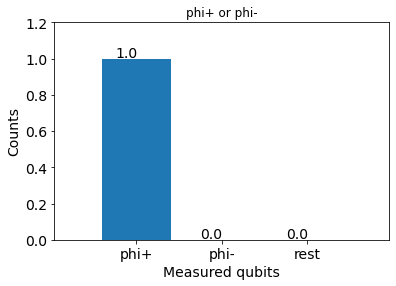

In [2]:
qasm = qiskit.Aer.get_backend("qasm_simulator")

seq = SequentialPOVMMeasurement(povm_bell, ["phi+", "phi-", "psi+", "psi-"])
# Prepare measured state
state = QuantumCircuit(2, 1)
state.h(0)
state.cnot(0, 1)

circuits = seq.make_circuits([["phi+", "phi-"], ["psi+", "psi-"]], state)
circuit1 = circuits[0]

job_0 = qiskit.execute(circuit1.q_circuit, qasm, shots=1000)
circuit1.plot_histogram(job_0.result().get_counts(), circuit1.one.label + ' or ' + circuit1.zero.label)

# prob = ProbabilisticMeasurement(povm_bell, ["phi+", "phi-", "psi+", "psi-"])
# results = prob.measure(state)
# prob.plot_histogram(results)

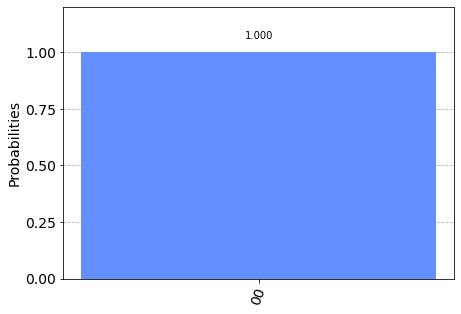

In [3]:
state = QuantumCircuit(2, 2)
state.h(0)
state.cnot(0, 1)

state.cnot(0, 1)
state.h(0)
state.measure(0, 0)
state.measure(1, 1)

job_0 = qiskit.execute(state, qasm, shots=1000)
plot_histogram(job_0.result().get_counts())

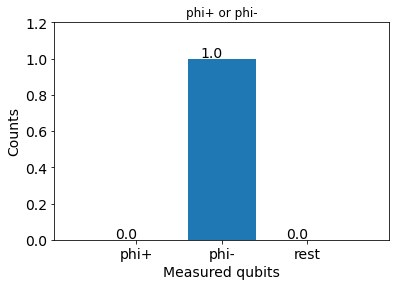

In [4]:
state = QuantumCircuit(2, 1)
state.x(0)
state.h(0)
state.cnot(0, 1)

circuits = seq.make_circuits([["phi+", "phi-"], ["psi+", "psi-"]], state)
circuit1 = circuits[0]

job_0 = qiskit.execute(circuit1.q_circuit, qasm, shots=1000)
circuit1.plot_histogram(job_0.result().get_counts(), circuit1.one.label + ' or ' + circuit1.zero.label)

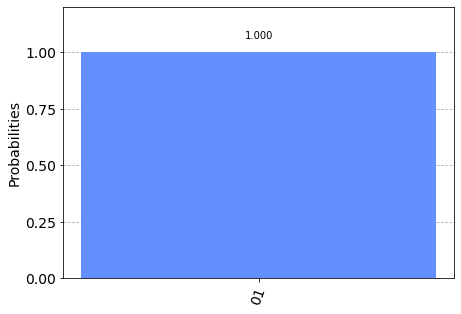

In [5]:
state = QuantumCircuit(2, 2)
state.x(0)
state.h(0)
state.cnot(0, 1)

state.cnot(0, 1)
state.h(0)
state.measure(0, 0)
state.measure(1, 1)

job_0 = qiskit.execute(state, qasm, shots=1000)
plot_histogram(job_0.result().get_counts())

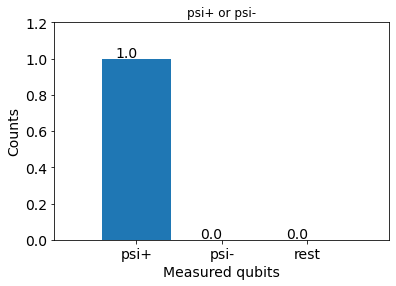

In [6]:
state = QuantumCircuit(2, 1)
state.x(1)
state.h(0)
state.cnot(0, 1)

circuits = seq.make_circuits([["psi+", "psi-"], ["phi+", "phi-"]], state)
circuit1 = circuits[0]

job_0 = qiskit.execute(circuit1.q_circuit, qasm, shots=1000)
circuit1.plot_histogram(job_0.result().get_counts(), circuit1.one.label + ' or ' + circuit1.zero.label)

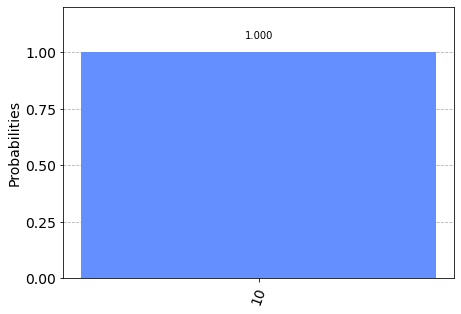

In [7]:
state = QuantumCircuit(2, 2)
state.x(1)
state.h(0)
state.cnot(0, 1)

state.cnot(0, 1)
state.h(0)
state.measure(0, 0)
state.measure(1, 1)

job_0 = qiskit.execute(state, qasm, shots=1000)
plot_histogram(job_0.result().get_counts())

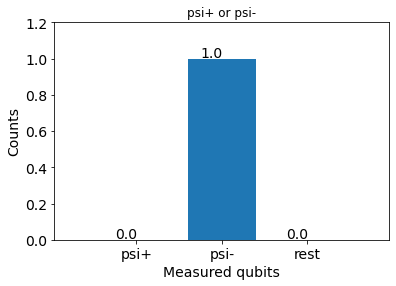

In [8]:
state = QuantumCircuit(2, 1)
state.x(0)
state.x(1)
state.h(0)
state.cnot(0, 1)

circuits = seq.make_circuits([["psi+", "psi-"], ["phi+", "phi-"]], state)
circuit1 = circuits[0]

job_0 = qiskit.execute(circuit1.q_circuit, qasm, shots=1000)
circuit1.plot_histogram(job_0.result().get_counts(), circuit1.one.label + ' or ' + circuit1.zero.label)

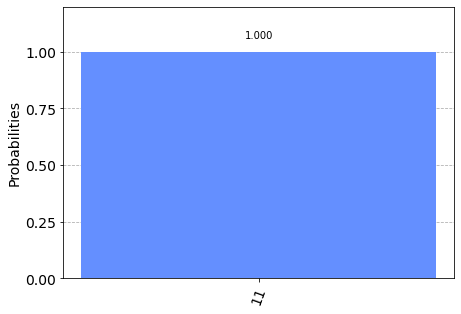

In [9]:
state = QuantumCircuit(2, 2)
state.x(0)
state.x(1)
state.h(0)
state.cnot(0, 1)

state.cnot(0, 1)
state.h(0)
state.measure(0, 0)
state.measure(1, 1)

job_0 = qiskit.execute(state, qasm, shots=1000)
plot_histogram(job_0.result().get_counts())

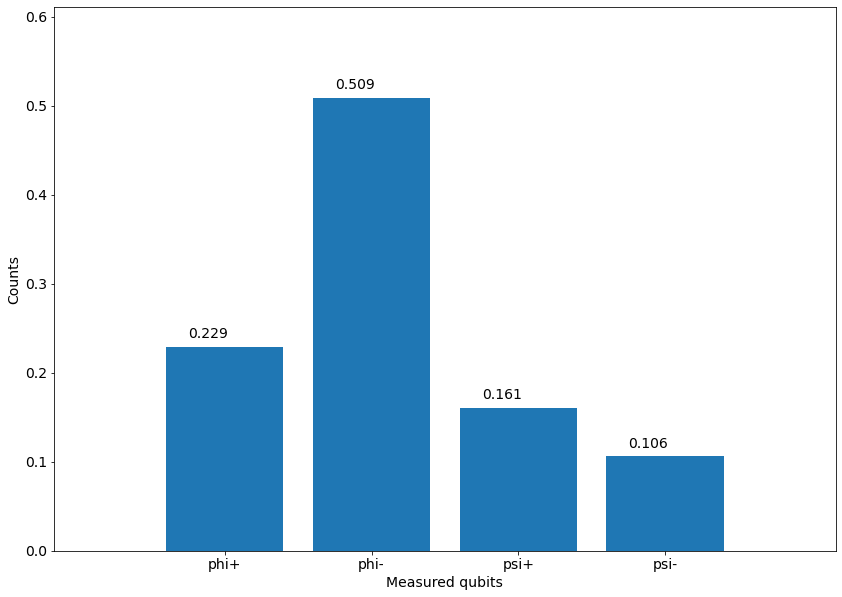

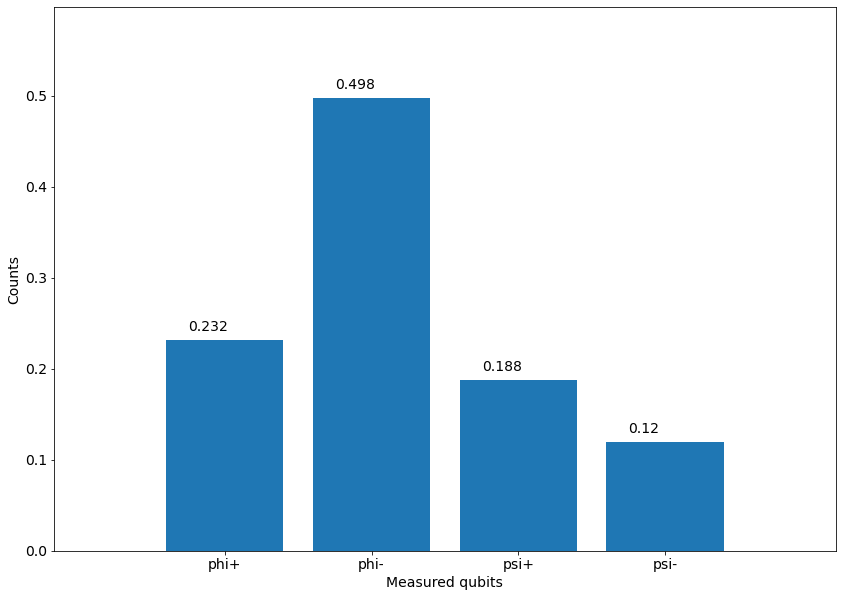

In [10]:
state = QuantumCircuit(2, 2)
unitaries = []
for i in range(4):
    rdm_u = random_unitary(2, 5)
    unitaries.append(rdm_u)

state.append(unitaries[0], [0])
state.append(unitaries[1], [1])
state.cnot(0, 1)
state.append(unitaries[2], [0])
state.append(unitaries[3], [1])

results = seq.measure([["psi+", "psi-"], ["phi+", "phi-"]], state)
seq.plot_histogram(results)

prob = ProbabilisticMeasurement(povm_bell, ["phi+", "phi-", "psi+", "psi-"])
results = prob.measure(state)
prob.plot_histogram(results)